In [156]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [157]:
df = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/Priscilla/priscilla-chart_data-volume-days-pageTypes.csv")

In [158]:
df

,days,11/03/2023,11/04/2023,11/05/2023,11/06/2023,11/07/2023,11/08/2023,11/09/2023,11/10/2023,11/11/2023,...,02/05/2024,02/06/2024,02/07/2024,02/08/2024,02/09/2024,02/10/2024,02/11/2024,02/12/2024,02/13/2024,02/14/2024
0,Online News,1494,832,499,744,686,350,689,429,184,...,270,262,204,512,254,108,105,431,228,315
1,QQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,YouTube,9,3,6,12,14,12,5,5,5,...,0,3,0,1,0,3,2,0,0,0
3,Broadcast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Facebook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Legacy Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Tumblr,43,100,121,96,61,35,37,29,54,...,74,117,87,53,43,44,138,73,68,52
7,Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,LinkedIn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Blogs,41,20,20,24,12,21,20,16,8,...,16,17,18,10,11,11,10,7,17,13


In [159]:
engagement = df.copy()

In [160]:
#Transpose Matrix
engagement = engagement.transpose()

In [161]:
#Creating df for Regression Analysis
reg_engagement = df.transpose().copy()

In [162]:
#Calculate Sum of engagements from each source
row_sums = engagement.sum(axis=1)

# Add row sums as a new column
engagement['total'] = row_sums
#engagement['total'] = engagement.iloc[:,6] #Only Forums

#Drop first Row containing all sources
engagement = engagement.drop(engagement.index[0])

#Drop all columns except the 'total' column
columns_to_keep = [engagement.columns[-1]]
engagement = engagement[columns_to_keep]

engagement.index.name = 'date'
engagement.index = pd.to_datetime(engagement.index)

In [163]:
engagement

,total
date,
2023-11-03,4237
2023-11-04,1624
2023-11-05,1073
2023-11-06,1208
2023-11-07,1481
...,...
2024-02-10,247
2024-02-11,315
2024-02-12,603


In [164]:
bo = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/Priscilla/priscilla-bo.csv")

In [165]:
bo = bo.dropna(axis=1)

In [166]:
bo

,date,revenue,to_date
0,11/03/2023,"$1,943,167","$2,168,687"
1,11/04/2023,"$1,807,145","$3,975,832"
2,11/05/2023,"$1,289,691","$5,265,523"
3,11/06/2023,"$543,600","$5,809,123"
4,11/07/2023,"$833,067","$6,642,190"
...,...,...,...
99,02/10/2024,$871,"$20,959,832"
100,02/11/2024,$744,"$20,960,576"
101,02/12/2024,$121,"$20,960,697"
102,02/13/2024,$97,"$20,960,794"


In [167]:
#Fixing 'date' column
#bo['date'] = pd.to_datetime(bo['date'] + '-2021', format='%b-%d-%Y')

#bo['date'] = bo['date'].dt.strftime('%m/%d/%Y')

# Making 'date' the index of the DataFrame
bo.set_index('date', inplace=True)

#Remove $ value
bo['revenue'] = bo['revenue'].str.replace('$', '')
bo['revenue'] = bo['revenue'].str.replace(',', '')

In [168]:
bo

,revenue,to_date
date,,
11/03/2023,1943167,"$2,168,687"
11/04/2023,1807145,"$3,975,832"
11/05/2023,1289691,"$5,265,523"
11/06/2023,543600,"$5,809,123"
11/07/2023,833067,"$6,642,190"
...,...,...
02/10/2024,871,"$20,959,832"
02/11/2024,744,"$20,960,576"
02/12/2024,121,"$20,960,697"


In [169]:
engagement['total'] = pd.to_numeric(engagement['total'], errors='coerce')
bo['revenue'] = pd.to_numeric(bo['revenue'], errors='coerce')

In [170]:
engagement_ts = engagement.copy()
bo_ts = bo.copy()

In [171]:
engagement_ts

,total
date,
2023-11-03,4237
2023-11-04,1624
2023-11-05,1073
2023-11-06,1208
2023-11-07,1481
...,...
2024-02-10,247
2024-02-11,315
2024-02-12,603


In [172]:
# Combine your datasets into a single DataFrame 
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

In [173]:
combined_df

,total,revenue
date,,
2023-11-03,4237,1943167
2023-11-04,1624,1807145
2023-11-05,1073,1289691
2023-11-06,1208,543600
2023-11-07,1481,833067
...,...,...
2024-02-10,247,871
2024-02-11,315,744
2024-02-12,603,121


In [174]:
#Making Data Stationary

#Differencing
#engagement_ts['total'] = engagement_ts['total'].diff()
#bo_ts['revenue'] = bo_ts['revenue'].diff()


#Taking Logarithm
#engagement_ts['total'] = np.log(engagement_ts['total'])
#bo_ts['revenue'] = bo_ts['revenue'].replace(-np.inf, np.nan)

# Dropping NA values after making it stationary
#engagement_ts.dropna(inplace=True)
#bo_ts.dropna(inplace=True)

In [175]:
#Checking Stationarity
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Example usage
check_stationarity(engagement_ts['total'])
check_stationarity(bo_ts['revenue'])

ADF Statistic: -6.017786
p-value: 0.000000
Critical Values:
	1%: -3.496
	5%: -2.890
	10%: -2.582
ADF Statistic: -2.441070
p-value: 0.130479
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


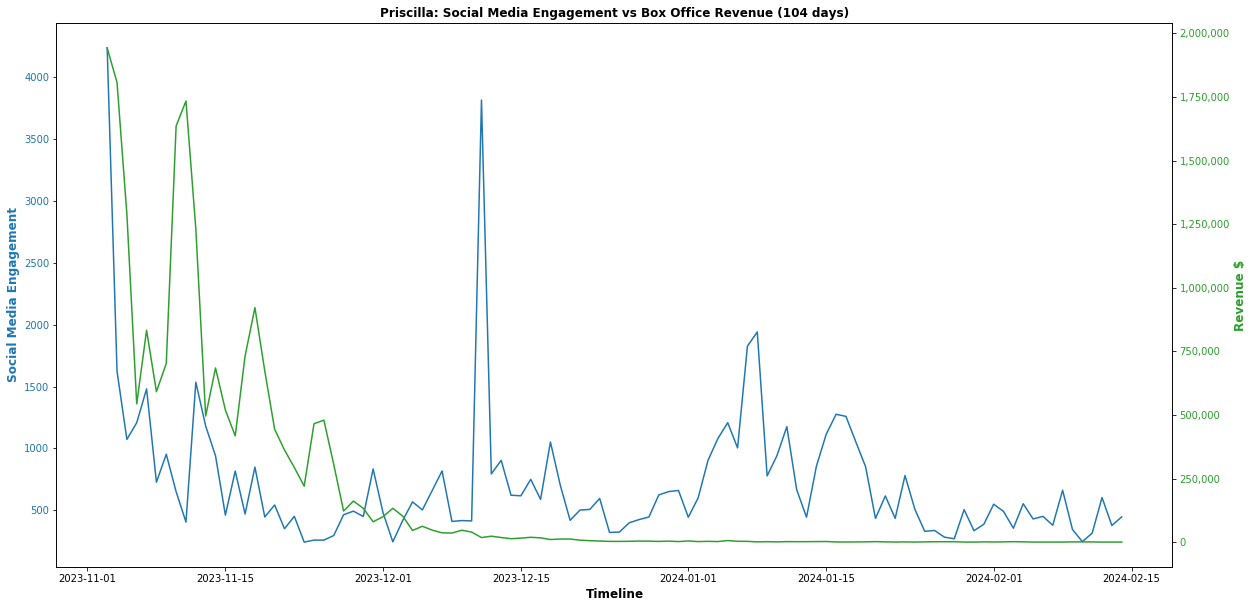

In [196]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:blue'
ax1.set_xlabel('Timeline',fontsize=12,fontweight='bold')
ax1.set_ylabel('Social Media Engagement',color=color,fontsize=12,fontweight='bold')
ax1.plot(combined_df.index,combined_df['total'],color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Revenue $',color=color,fontsize=12,fontweight='bold')
ax2.plot(combined_df.index, combined_df['revenue'],color=color)
ax2.tick_params(axis='y',labelcolor=color)

y_labels = ['{:,.0f}'.format(y) for y in plt.gca().get_yticks()]
plt.gca().set_yticklabels(y_labels)
plt.title('Priscilla: Social Media Engagement vs Box Office Revenue (104 days)',fontsize=12,fontweight='bold')

plt.grid(False)
plt.show()

In [177]:
correlation, _ = pearsonr(combined_df['total'], combined_df['revenue'])

In [178]:
print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: 0.36616321142860353


Maximum Pearson correlation coefficient: 0.36616321142860353
Lag associated with Maximum Pearson correlation coefficient: 0


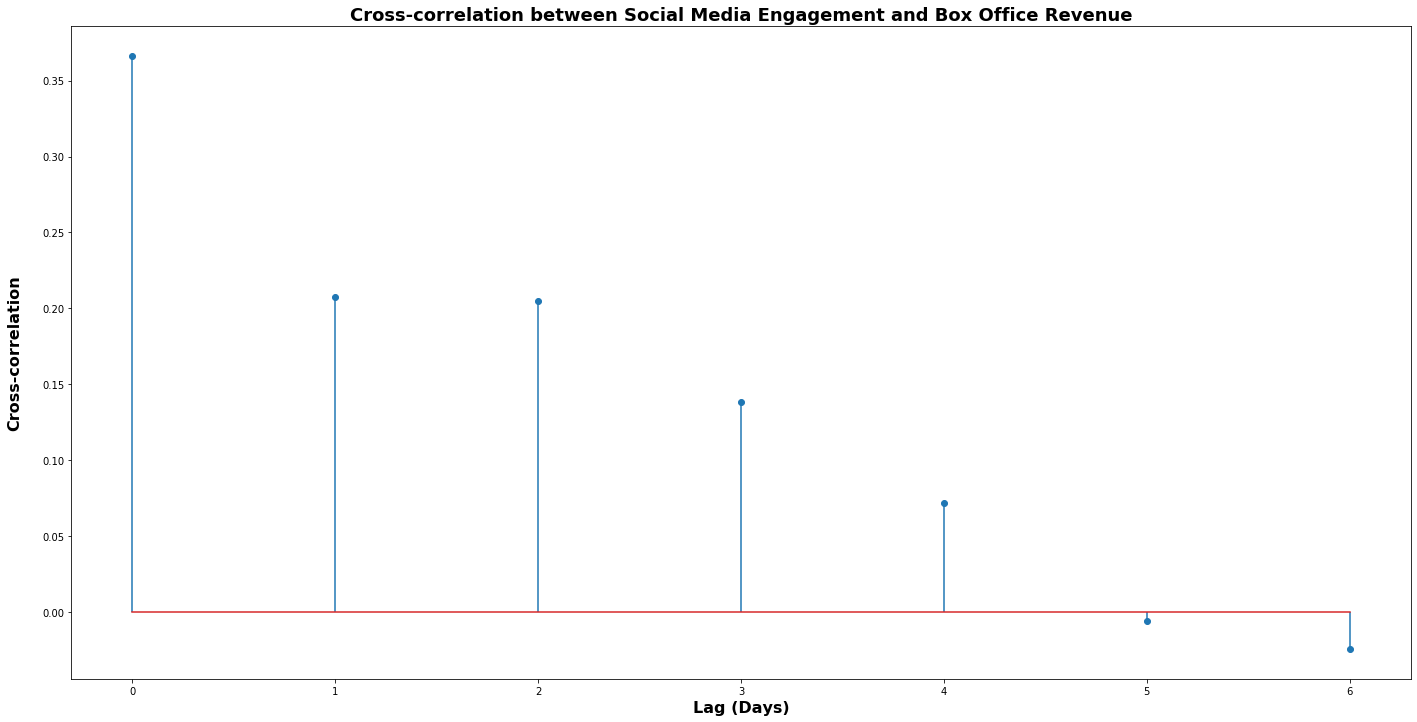

In [179]:
def cross_correlation(series1, series2, lag=0):
    return series1.corr(series2.shift(lag))

# Example usage:
lags = range(0, 7)  # Example lag values from 0 to 12
cross_corr_values = {}
for lag in lags:
    cross_corr_values[lag] = cross_correlation(combined_df['total'], combined_df['revenue'], lag)


max_pair = max(cross_corr_values.items(), key=lambda x: x[1])

#print(cross_corr_values.values())
#cross_corr_values = [cross_correlation(combined_df['total'], combined_df['revenue'], lag) for lag in lags]

print(f'Maximum Pearson correlation coefficient: {max_pair[1]}')
print(f'Lag associated with Maximum Pearson correlation coefficient: {max_pair[0]}')
# Plotting the cross-correlation values
import matplotlib
#matplotlib.use('TkAgg')  # Use TkAgg backend
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
plt.stem(lags, cross_corr_values.values(), use_line_collection=True)
plt.xlabel('Lag (Days)',fontsize=16,fontweight='bold')
plt.ylabel('Cross-correlation',fontsize=16,fontweight='bold',labelpad=20)
plt.title('Cross-correlation between Social Media Engagement and Box Office Revenue',fontsize=18,fontweight='bold')
plt.show()

In [180]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Combine your datasets into a single DataFrame for the Granger causality test
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

# Perform the Granger causality test
# The maxlag parameter is the maximum lag to test for, and the test 'ssr_chi2test' is one of the possible tests
granger_test_results = grangercausalitytests(combined_df, maxlag=10, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6463  , p=0.4233  , df_denom=100, df_num=1
ssr based chi2 test:   chi2=0.6657  , p=0.4145  , df=1
likelihood ratio test: chi2=0.6636  , p=0.4153  , df=1
parameter F test:         F=0.6463  , p=0.4233  , df_denom=100, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1049  , p=0.3354  , df_denom=97, df_num=2
ssr based chi2 test:   chi2=2.3238  , p=0.3129  , df=2
likelihood ratio test: chi2=2.2977  , p=0.3170  , df=2
parameter F test:         F=1.1049  , p=0.3354  , df_denom=97, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7752  , p=0.1572  , df_denom=94, df_num=3
ssr based chi2 test:   chi2=5.7222  , p=0.1259  , df=3
likelihood ratio test: chi2=5.5660  , p=0.1347  , df=3
parameter F test:         F=1.7752  , p=0.1572  , df_denom=94, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3355  , p=0.2628  , df

In [181]:
#Linear Regression Fit
reg_engagement

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
days,Online News,QQ,YouTube,Broadcast,Facebook,Legacy Instagram,Tumblr,Instagram,LinkedIn,Blogs,Forums,Facebook Public,X,VK,Review,Reddit,TvEyes Broadcast,4Chan
11/03/2023,1494,0,9,0,0,0,43,0,0,41,25,10,2446,0,9,160,0,0
11/04/2023,832,0,3,0,0,0,100,0,0,20,16,5,545,0,12,91,0,0
11/05/2023,499,0,6,0,0,0,121,0,0,20,31,4,322,0,8,62,0,0
11/06/2023,744,0,12,0,0,0,96,0,0,24,21,9,242,0,11,49,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02/10/2024,108,0,3,0,0,0,44,0,0,11,4,2,39,0,13,23,0,0
02/11/2024,105,0,2,0,0,0,138,0,0,10,4,2,35,0,2,17,0,0
02/12/2024,431,0,0,0,0,0,73,0,0,7,8,1,63,0,2,18,0,0
02/13/2024,228,0,0,0,0,0,68,0,0,17,9,2,34,0,1,18,0,0


In [182]:
#Make first row as Columns
reg_engagement.columns = reg_engagement.iloc[0]

In [183]:
#Drop first row
reg_engagement = reg_engagement.drop(reg_engagement.index[0])

In [191]:
#Drop Columns (Content Sources where all values are 0)
reg_engagement = reg_engagement.loc[:, (reg_engagement != 0).any(axis=0)]

In [192]:
reg_engagement = reg_engagement.rename(columns={'days': 'date'})

In [193]:
reg_engagement

days,Online News,YouTube,Tumblr,Instagram,Blogs,Forums,Facebook Public,X,Review,Reddit
11/03/2023,1494,9,43,0,41,25,10,2446,9,160
11/04/2023,832,3,100,0,20,16,5,545,12,91
11/05/2023,499,6,121,0,20,31,4,322,8,62
11/06/2023,744,12,96,0,24,21,9,242,11,49
11/07/2023,686,14,61,0,12,14,3,321,11,359
...,...,...,...,...,...,...,...,...,...,...
02/10/2024,108,3,44,0,11,4,2,39,13,23
02/11/2024,105,2,138,0,10,4,2,35,2,17
02/12/2024,431,0,73,0,7,8,1,63,2,18
02/13/2024,228,0,68,0,17,9,2,34,1,18


In [187]:
shift = 0 #Based on Lag

In [188]:
bo_series = bo['revenue']

In [189]:
bo_series

date
11/03/2023    1943167
11/04/2023    1807145
11/05/2023    1289691
11/06/2023     543600
11/07/2023     833067
               ...   
02/10/2024        871
02/11/2024        744
02/12/2024        121
02/13/2024         97
02/14/2024        145
Name: revenue, Length: 104, dtype: int64

In [108]:
bo_series_shifted = bo_series.shift(shift)

In [109]:
bo_series_shifted = bo_series_shifted[:shift]

In [110]:
bo_series_shifted

Series([], Name: revenue, dtype: object)

In [49]:
reg_engagement = reg_engagement.iloc[:shift, :]

In [190]:
reg_engagement

days,Online News,YouTube,Tumblr,Instagram,Blogs,Forums,Facebook Public,X,Review,Reddit
11/03/2023,1494,9,43,0,41,25,10,2446,9,160
11/04/2023,832,3,100,0,20,16,5,545,12,91
11/05/2023,499,6,121,0,20,31,4,322,8,62
11/06/2023,744,12,96,0,24,21,9,242,11,49
11/07/2023,686,14,61,0,12,14,3,321,11,359
...,...,...,...,...,...,...,...,...,...,...
02/10/2024,108,3,44,0,11,4,2,39,13,23
02/11/2024,105,2,138,0,10,4,2,35,2,17
02/12/2024,431,0,73,0,7,8,1,63,2,18
02/13/2024,228,0,68,0,17,9,2,34,1,18


In [151]:
reg_engagement = reg_engagement.astype(int)

In [154]:
reg_engagement

days,Online News,YouTube,Tumblr,Instagram,Blogs,Forums,Facebook Public,X,Review,Reddit
11/03/2023,1494,9,43,0,41,25,10,2446,9,160
11/04/2023,832,3,100,0,20,16,5,545,12,91
11/05/2023,499,6,121,0,20,31,4,322,8,62
11/06/2023,744,12,96,0,24,21,9,242,11,49
11/07/2023,686,14,61,0,12,14,3,321,11,359
...,...,...,...,...,...,...,...,...,...,...
02/10/2024,108,3,44,0,11,4,2,39,13,23
02/11/2024,105,2,138,0,10,4,2,35,2,17
02/12/2024,431,0,73,0,7,8,1,63,2,18
02/13/2024,228,0,68,0,17,9,2,34,1,18


In [53]:
bo_series_shifted

date
03/31/2023    12910476.0
04/01/2023     9072950.0
04/02/2023     2776969.0
04/03/2023     3630908.0
04/04/2023     1863667.0
                 ...    
05/27/2023       46017.0
05/28/2023       34637.0
05/29/2023       14022.0
05/30/2023       13191.0
05/31/2023       10306.0
Name: revenue, Length: 62, dtype: float64

In [194]:
# Prepare the features (X) and the target (y)
X = reg_engagement  # 'Reg Engagement' df as features
y = bo_series  # 'Revenue' series

# Reset index if necessary
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the model (for the intercept)
X_scaled_with_const = sm.add_constant(X_scaled)

# Fit the OLS model
model = sm.OLS(y, X_scaled_with_const).fit()

# Get the regression report
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     5.720
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.21e-06
Time:                        15:42:29   Log-Likelihood:                -1467.4
No. Observations:                 104   AIC:                             2957.
Df Residuals:                      93   BIC:                             2986.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.994e+05   3.37e+04     

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [195]:
# Extract the coefficients (excluding the intercept) and sort them by their absolute values
coefficients = model.params.drop('const').abs().sort_values(ascending=False)

# Print the sorted coefficients to identify the top contributing features
print("\nTop Contributing Features:")
print(coefficients)


Top Contributing Features:
X                  165826.059976
Blogs              112403.254722
YouTube             80756.352701
Tumblr              64818.784861
Instagram           58670.775376
Reddit              53362.565346
Online News         51209.973192
Review              24479.079727
Facebook Public     17502.231702
Forums                452.894909
dtype: float64
